## Prerequisites

First I will import the required libraries. I'm going to be using numpy for the matrix operations and matplotlib for creating graphs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First I'll define $f(x) = \frac{1}{1+25x^2}$ as a lambda function.

In [2]:
f = lambda x : (1 + 25*x**2)**-1

Now I will define lambda functions for the basis functions. Essentially they return the value for $x$ for at a particular $n$.

In [3]:
monomial_basis = lambda n, x : x**n
chebyshev_basis = lambda n, x : np.cos(n*np.arccos(x))

Next I will define lambda functoins for the x points we want to interpolate for.

In [4]:
uniform_pts = lambda n : np.linspace(-1, 1, n+1)
chebyshev_pts = lambda n : np.array([np.cos((-i/n)*np.pi) for i in range(n+1)])

Since $v_{ij}$ is just $T_J(x_i)$, where $T$ is the basis function, I'll define another lambda function for computing the Vandermonde matrix $V$.

In [5]:
vandermonde = lambda xpts, basis : np.array([[basis(j, xpts[i]) for j in range(len(xpts))] for i in range(len(xpts))])

Now I'll define a lambda function for evaluating the set of $x_i$ to get $y_i$ as well as the values of $n$ given in the problem.

In [6]:
f_ypts = lambda f, xpts : np.array([f(x) for x in xpts])
ns = [4, 8, 16, 32, 64, 128]

A wrapper function to get the coefficient matrix $a$ in $Va=b$

In [7]:
coef_solver = lambda V, b : np.linalg.solve(V, b)

Finally the interpolation function for $f$

In [8]:
def interpolation(coef, basis):
    n = len(coef)
    def _inp(x):
        s = 0
        for i in range(n):
            s += coef[i]*basis(i, x)
        return s
    return _inp

A function for approximating the $\infty$-norm over the domain between 2 functions.

In [9]:
def max_err(f1, f2):
    x = np.linspace(-1, 1, 2000)
    y1 = f_ypts(f1, x)
    y2 = f_ypts(f2, x)
    return np.max(np.abs(y1 - y2))

## Part I: Evenly spaced points and monomials as the basis.

In [10]:
errors = []
cond_n = []
for n in ns: 
    xpts = uniform_pts(n)
    ypts = f_ypts(f, xpts)
    
    V = vandermonde(xpts, monomial_basis)
    coef = coef_solver(V, ypts)
    
    ap = interpolation(coef, monomial_basis)
    
    errors.append(max_err(f, ap))
    cond_n.append(np.linalg.cond(V))

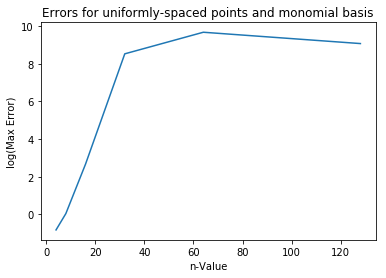

In [11]:
plt.plot(ns, np.log(errors))
plt.title('Errors for uniformly-spaced points and monomial basis')
plt.xlabel('n-Value')
plt.ylabel('log(Max Error)')
plt.show()

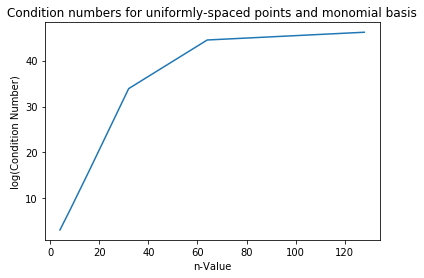

In [12]:
plt.plot(ns, np.log(cond_n))
plt.title('Condition numbers for uniformly-spaced points and monomial basis')
plt.xlabel('n-Value')
plt.ylabel('log(Condition Number)')
plt.show()

## Part II: Evenly spaced points and Chebyshev polynomials as the basis.

In [13]:
errors = []
cond_n = []
for n in ns: 
    xpts = uniform_pts(n)
    ypts = f_ypts(f, xpts)
    
    V = vandermonde(xpts, chebyshev_basis)
    coef = coef_solver(V, ypts)
    
    ap = interpolation(coef, chebyshev_basis)
    
    errors.append(max_err(f, ap))
    cond_n.append(np.linalg.cond(V))

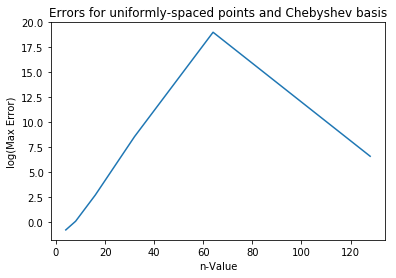

In [14]:
plt.plot(ns, np.log(errors))
plt.title('Errors for uniformly-spaced points and Chebyshev basis')
plt.xlabel('n-Value')
plt.ylabel('log(Max Error)')
plt.show()

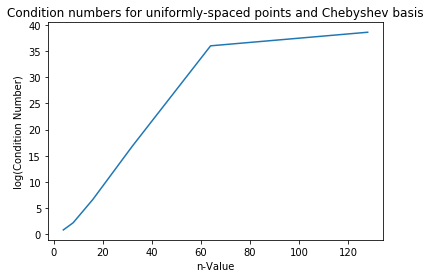

In [15]:
plt.plot(ns, np.log(cond_n))
plt.title('Condition numbers for uniformly-spaced points and Chebyshev basis')
plt.xlabel('n-Value')
plt.ylabel('log(Condition Number)')
plt.show()

## Part III: Chebyshev points and monomials as the basis.

In [16]:
errors = []
cond_n = []
for n in ns: 
    xpts = chebyshev_pts(n)
    ypts = f_ypts(f, xpts)
    
    V = vandermonde(xpts, monomial_basis)
    coef = coef_solver(V, ypts)
    
    ap = interpolation(coef, monomial_basis)
    
    errors.append(max_err(f, ap))
    cond_n.append(np.linalg.cond(V))

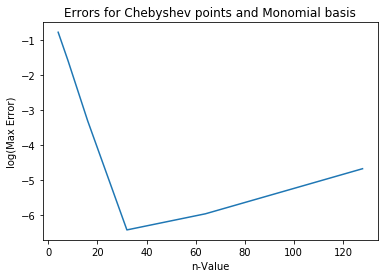

In [17]:
plt.plot(ns, np.log(errors))
plt.title('Errors for Chebyshev points and Monomial basis')
plt.xlabel('n-Value')
plt.ylabel('log(Max Error)')
plt.show()

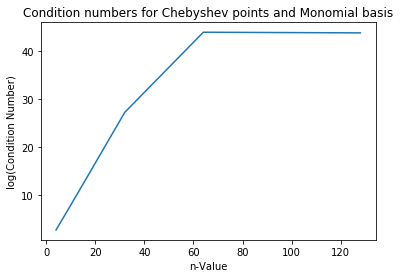

In [18]:
plt.plot(ns, np.log(cond_n))
plt.title('Condition numbers for Chebyshev points and Monomial basis')
plt.xlabel('n-Value')
plt.ylabel('log(Condition Number)')
plt.show()

## Part IV: Chebyshev points and Chebyshev polynomials as the basis.

In [19]:
errors = []
cond_n = []
for n in ns: 
    xpts = chebyshev_pts(n)
    ypts = f_ypts(f, xpts)
    
    V = vandermonde(xpts, chebyshev_basis)
    coef = coef_solver(V, ypts)
    
    ap = interpolation(coef, chebyshev_basis)
    
    errors.append(max_err(f, ap))
    cond_n.append(np.linalg.cond(V))

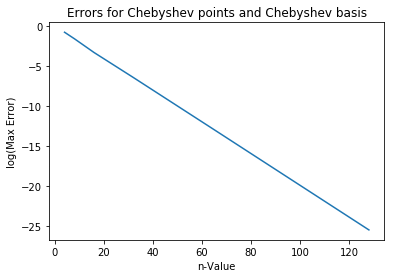

In [20]:
plt.plot(ns, np.log(errors))
plt.title('Errors for Chebyshev points and Chebyshev basis')
plt.xlabel('n-Value')
plt.ylabel('log(Max Error)')
plt.show()

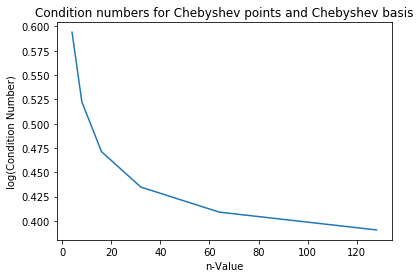

In [21]:
plt.plot(ns, np.log(cond_n))
plt.title('Condition numbers for Chebyshev points and Chebyshev basis')
plt.xlabel('n-Value')
plt.ylabel('log(Condition Number)')
plt.show()